In [7]:
# Training Spacy with Labelled Data

In [8]:
## Run Spacey Small Pipeline with Labelled Tweets Dataset

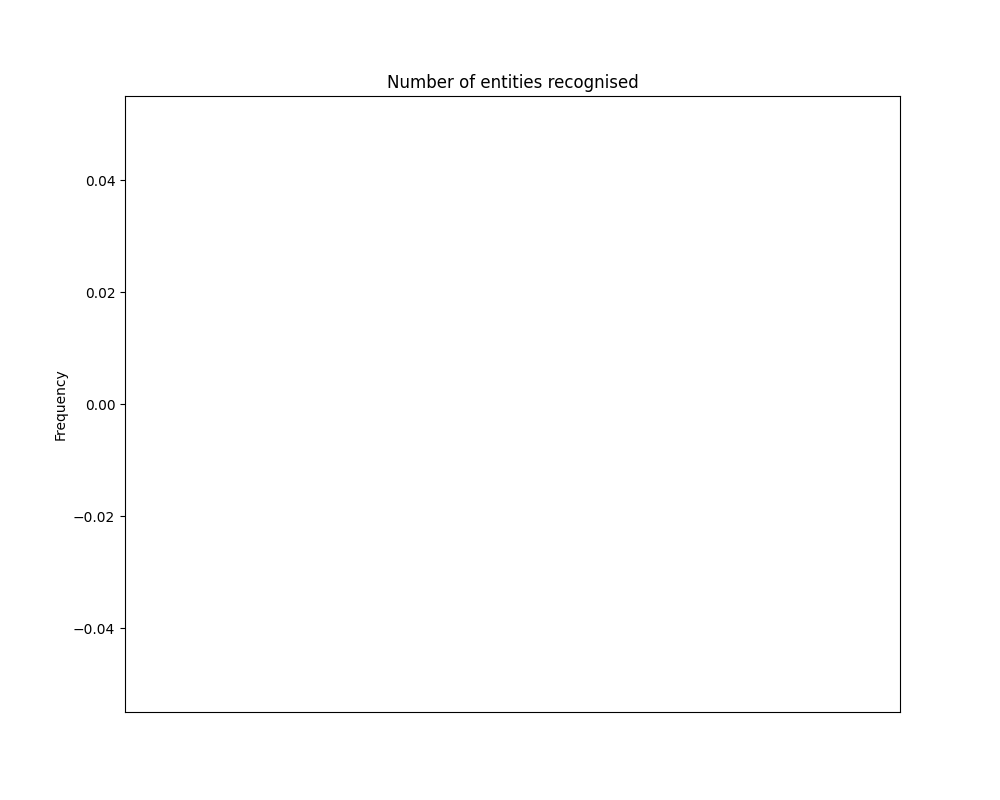

In [21]:
%matplotlib widget
# import necessary libraries
import json
import csv
import spacy
import matplotlib.pyplot as plt
from itertools import groupby, zip_longest

entities = {}
entity_count = {}
TWEET_AMOUNT = 1000

# Load a pre-trained English language model from spacy library
nlp = spacy.load("en_core_web_sm")

# Read tweets from JSON file
with open('C:/Users/faith/Downloads/project-1-at-2023-03-16-22-05-cdab445f.json', encoding='utf-8') as file:
    data = json.load(file)
    tweets_list = []
    for tweet in data:
        try:
            tweets_list.append(tweet['text'])
        except KeyError:
            pass


# Process tweets using spaCy and extract entities
for doc in nlp.pipe(tweets_list[:TWEET_AMOUNT], disable=['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer']):
    # Add all identified entities to a list, and store those under their label in the entities dictionary, no duplicates.
    # e.g entities['ORG'] = ['Apple', 'Dell']
    temp = {key: list(set(map(lambda x: str(x), g))) for key, g in groupby(sorted(doc.ents, key=lambda x: x.label_), lambda x: x.label_)}
    for key, value in temp.items():
        if key in entities.keys():
            entities[key] += value
            entity_count[key] += len(value)
        else:
            entities[key] = value
            entity_count[key] = len(value)

# Merge the lists of entities which are columns, together, to create rows for the csv file
entity_lists = [set(entities[key]) for key in entities.keys()]
entity_rows = zip_longest(*entity_lists, fillvalue=" ")
entity_rows = [*entity_rows]

# Write list of recognised entities to a csv file in columns under their label
with open('entities_recognised(en_core_web_trf).csv','w', newline='') as out:
    csv_out=csv.writer(out, delimiter=',', skipinitialspace=True)
    csv_out.writerow([key for key in entities.keys()])
    for row in entity_rows:
        csv_out.writerow(row)

# Display Metrics of entities recognised
entity_labels = list(entities.keys())
entity_counts = list(entity_count.values())

plt.figure(figsize=(10,8))
plt.bar(entity_labels, entity_counts, align='edge', alpha=0.5, width=0.5)
plt.xticks(entity_labels,entity_labels, rotation='vertical')
plt.ylabel('Frequency')
plt.title('Number of entities recognised')
plt.show()

In [ ]:
## Run Spacey Accuracy Pipeline with Labelled Tweets Dataset

In [25]:
%matplotlib widget
# import necessary libraries
import spacy
import matplotlib.pyplot as plt
from itertools import groupby, zip_longest
import json

entities = {}
entity_count = {}
TWEET_AMOUNT = 1000

# load a pre-trained English language model from spacy library
nlp = spacy.load("en_core_web_sm")

with open('C:/Users/faith/Downloads/project-1-at-2023-03-16-22-05-cdab445f.json', encoding='utf-8') as f:
    tweets = json.load(f)

for tweet in tweets[:TWEET_AMOUNT]:
    doc = nlp(tweet['text']) #KEY NAME NEEDS TO BE CHANGED 
    # Add all identified entities to a list, and store those under their label in the entities dictionary, no duplicates.
    # e.g entities['ORG'] = ['Apple', 'Dell']
    temp = {key: list(set(map(lambda x: str(x), g))) for key, g in groupby(sorted(doc.ents, key=lambda x: x.label_), lambda x: x.label_)}
    for key, value in temp.items():
        if key in entities.keys():
            entities[key] += value
            entity_count[key] += len(value)
        else:
            entities[key] = value
            entity_count[key] = len(value)

entity_lists = [set(entities[key]) for key in entities.keys()]

# Merge the lists of entities which are columns, together, to create rows for the csv file
entity_rows = zip_longest(*entity_lists, fillvalue=" ")
entity_rows = [*entity_rows]

# Write list of recognised entities to a csv file in columns under their label
with open('entities_recognised(en_core_web_trf).csv','w') as out:
    csv_out=csv.writer(out, delimiter=',', skipinitialspace=True)
    csv_out.writerow([key for key in entities.keys()])
    for row in entity_rows:
        csv_out.writerow(row)

#Display Metrics of entities recognised
entity_labels = list(entities.keys())
entity_counts = list(entity_count.values())

plt.figure(figsize=(10,8))
plt.bar(entity_labels, entity_counts, align='edge', alpha=0.5, width=0.5)
plt.xticks(entity_labels,entity_labels, rotation='vertical')
plt.ylabel('Frequency')
plt.title('Number of entities recognised')

KeyError: 'text'